# Preambles, import

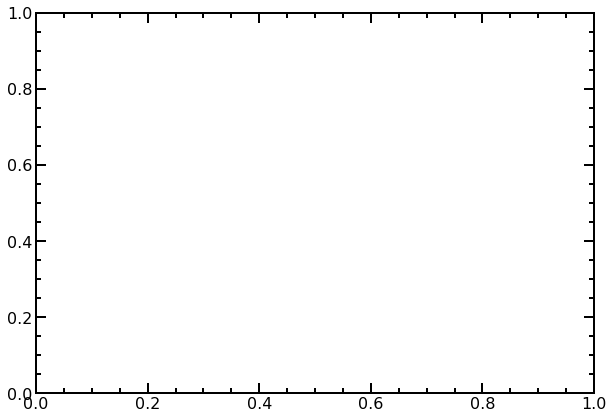

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
from Fluxonium_hamiltonians import qchard_transmon as transmon
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

# Parameters, sweep coupling

In [7]:
detuning = 190*1e-3 #GHz
omega1 = 5.23 #GHz
omega2 = 5.29
omega3 = 5.46
omega4 = 5.63
alpha1 = -0.273
alpha2 = -0.273
alpha3 = -0.270
alpha4 = -0.267
nlev = 5
qubit1 = transmon.TransmonSimple(omega_q = omega1, alpha = alpha1, nlev = nlev)
qubit2 = transmon.TransmonSimple(omega_q = omega2, alpha = alpha2, nlev = nlev)
qubit3 = transmon.TransmonSimple(omega_q = omega3, alpha = alpha3, nlev = nlev)
qubit4 = transmon.TransmonSimple(omega_q = omega4, alpha = alpha4, nlev = nlev)
E_int_array = np.linspace(0,0.005,101) #GHz
coupling_type = 'JC-rwa'

In [8]:
#Sweep coupling
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(E_int_array)))
for idx, E_int in enumerate(E_int_array):
    system = coupobj.CoupledObjects(qubit3, qubit4,
                                    [qubit3, qubit4, E_int, coupling_type])
    energies_coupled_swE[:,idx] = system.levels()

In [9]:
# Checking
print (system.level('01'))
print (system.level('10'))
print (system.eigvec('01'))

5.630146931829632
5.459853068170367
Quantum object: dims = [[5, 5], [1, 1]], shape = (25, 1), type = ket
Qobj data =
[[0.        ]
 [0.9995685 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02937369]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


-0.16999999999999993


(0.0, 5.0)

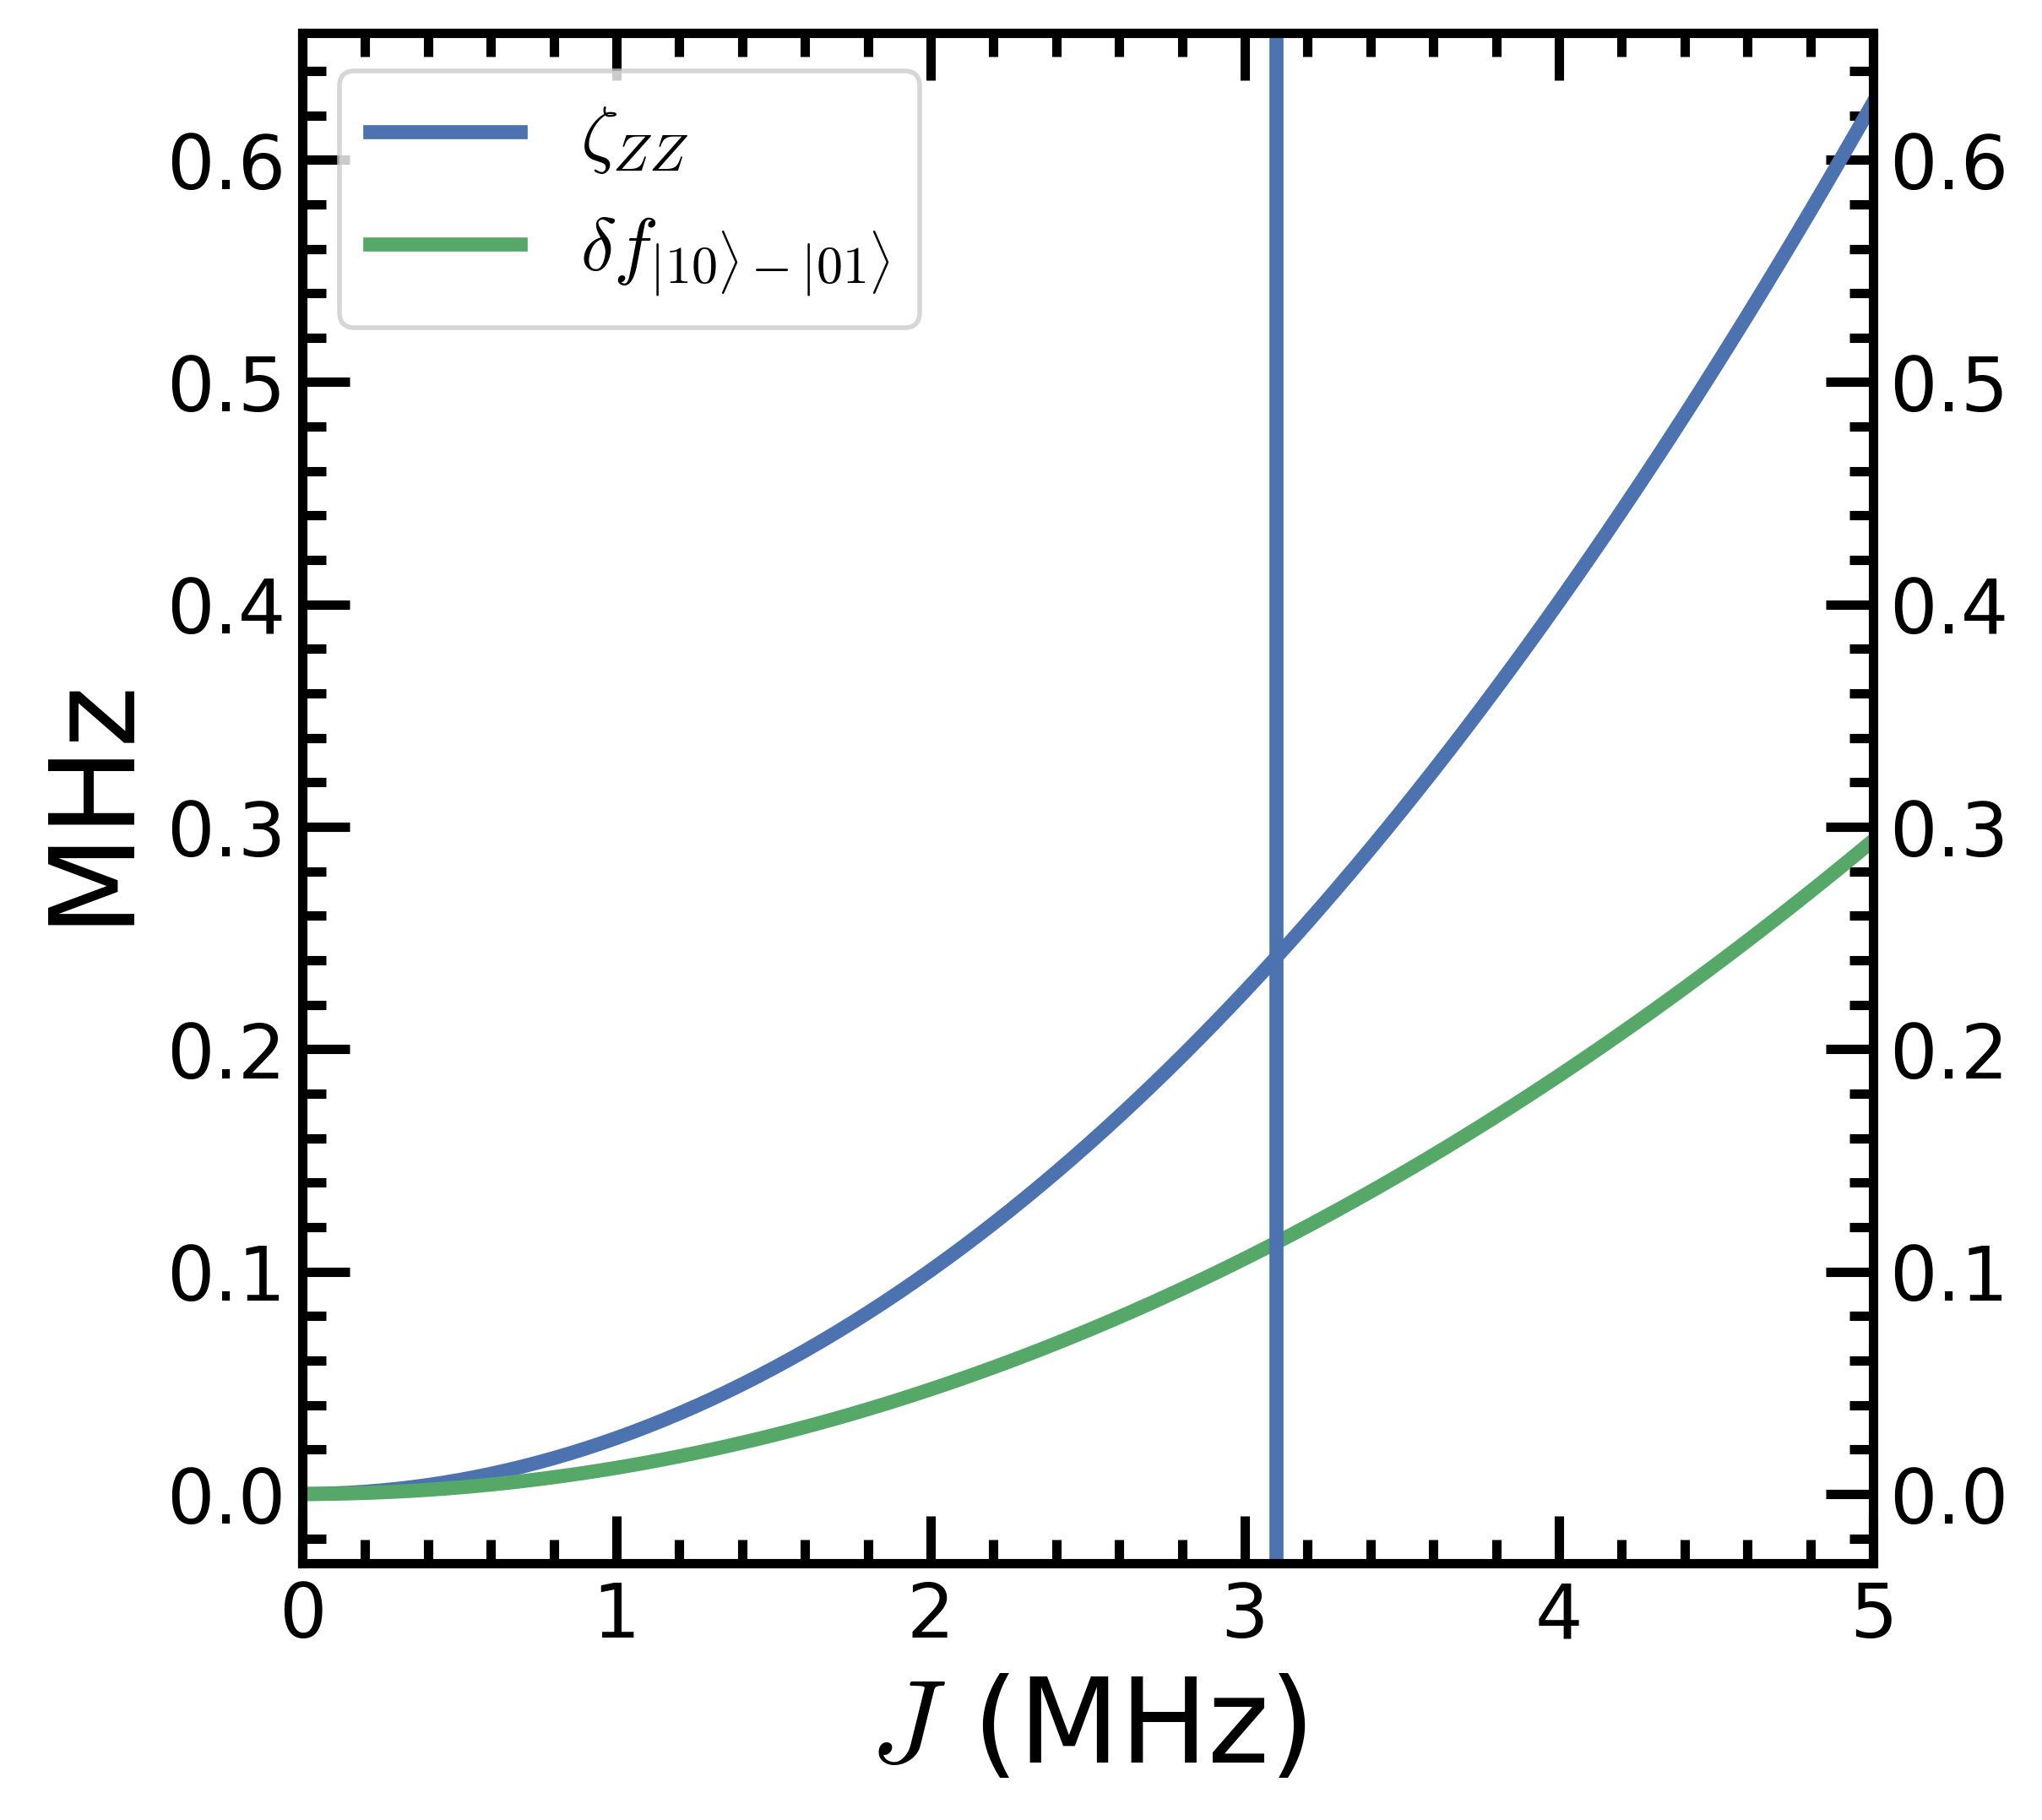

In [10]:
#Calculate ZZ rate:
plt.figure(figsize = [6,6])
zeta_ZZ = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift = energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('01'), :]
freq_anchor = freq_shift[0]
print (freq_anchor)
freq_shift = freq_shift - freq_anchor
plt.plot(E_int_array*1e3, abs(zeta_ZZ)*1e3, label = r'$\zeta_{ZZ}$')
plt.plot(E_int_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |01\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$J$ (MHz)')
plt.axvline(x=3.1)
plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])

In [5]:
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(E_int_array)))
for idx, E_int in enumerate(E_int_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    H0 = system.H_0()
    op1 = system.promote_op(qubit1, qubit1.a()+qubit1.a().dag())
    op2 = system.promote_op(qubit2, qubit2.a()+qubit2.a().dag())
    H = H0 + E_int*op1*op2
    energies_coupled_swE[:,idx] = H.eigenenergies()

(0.0, 10.0)

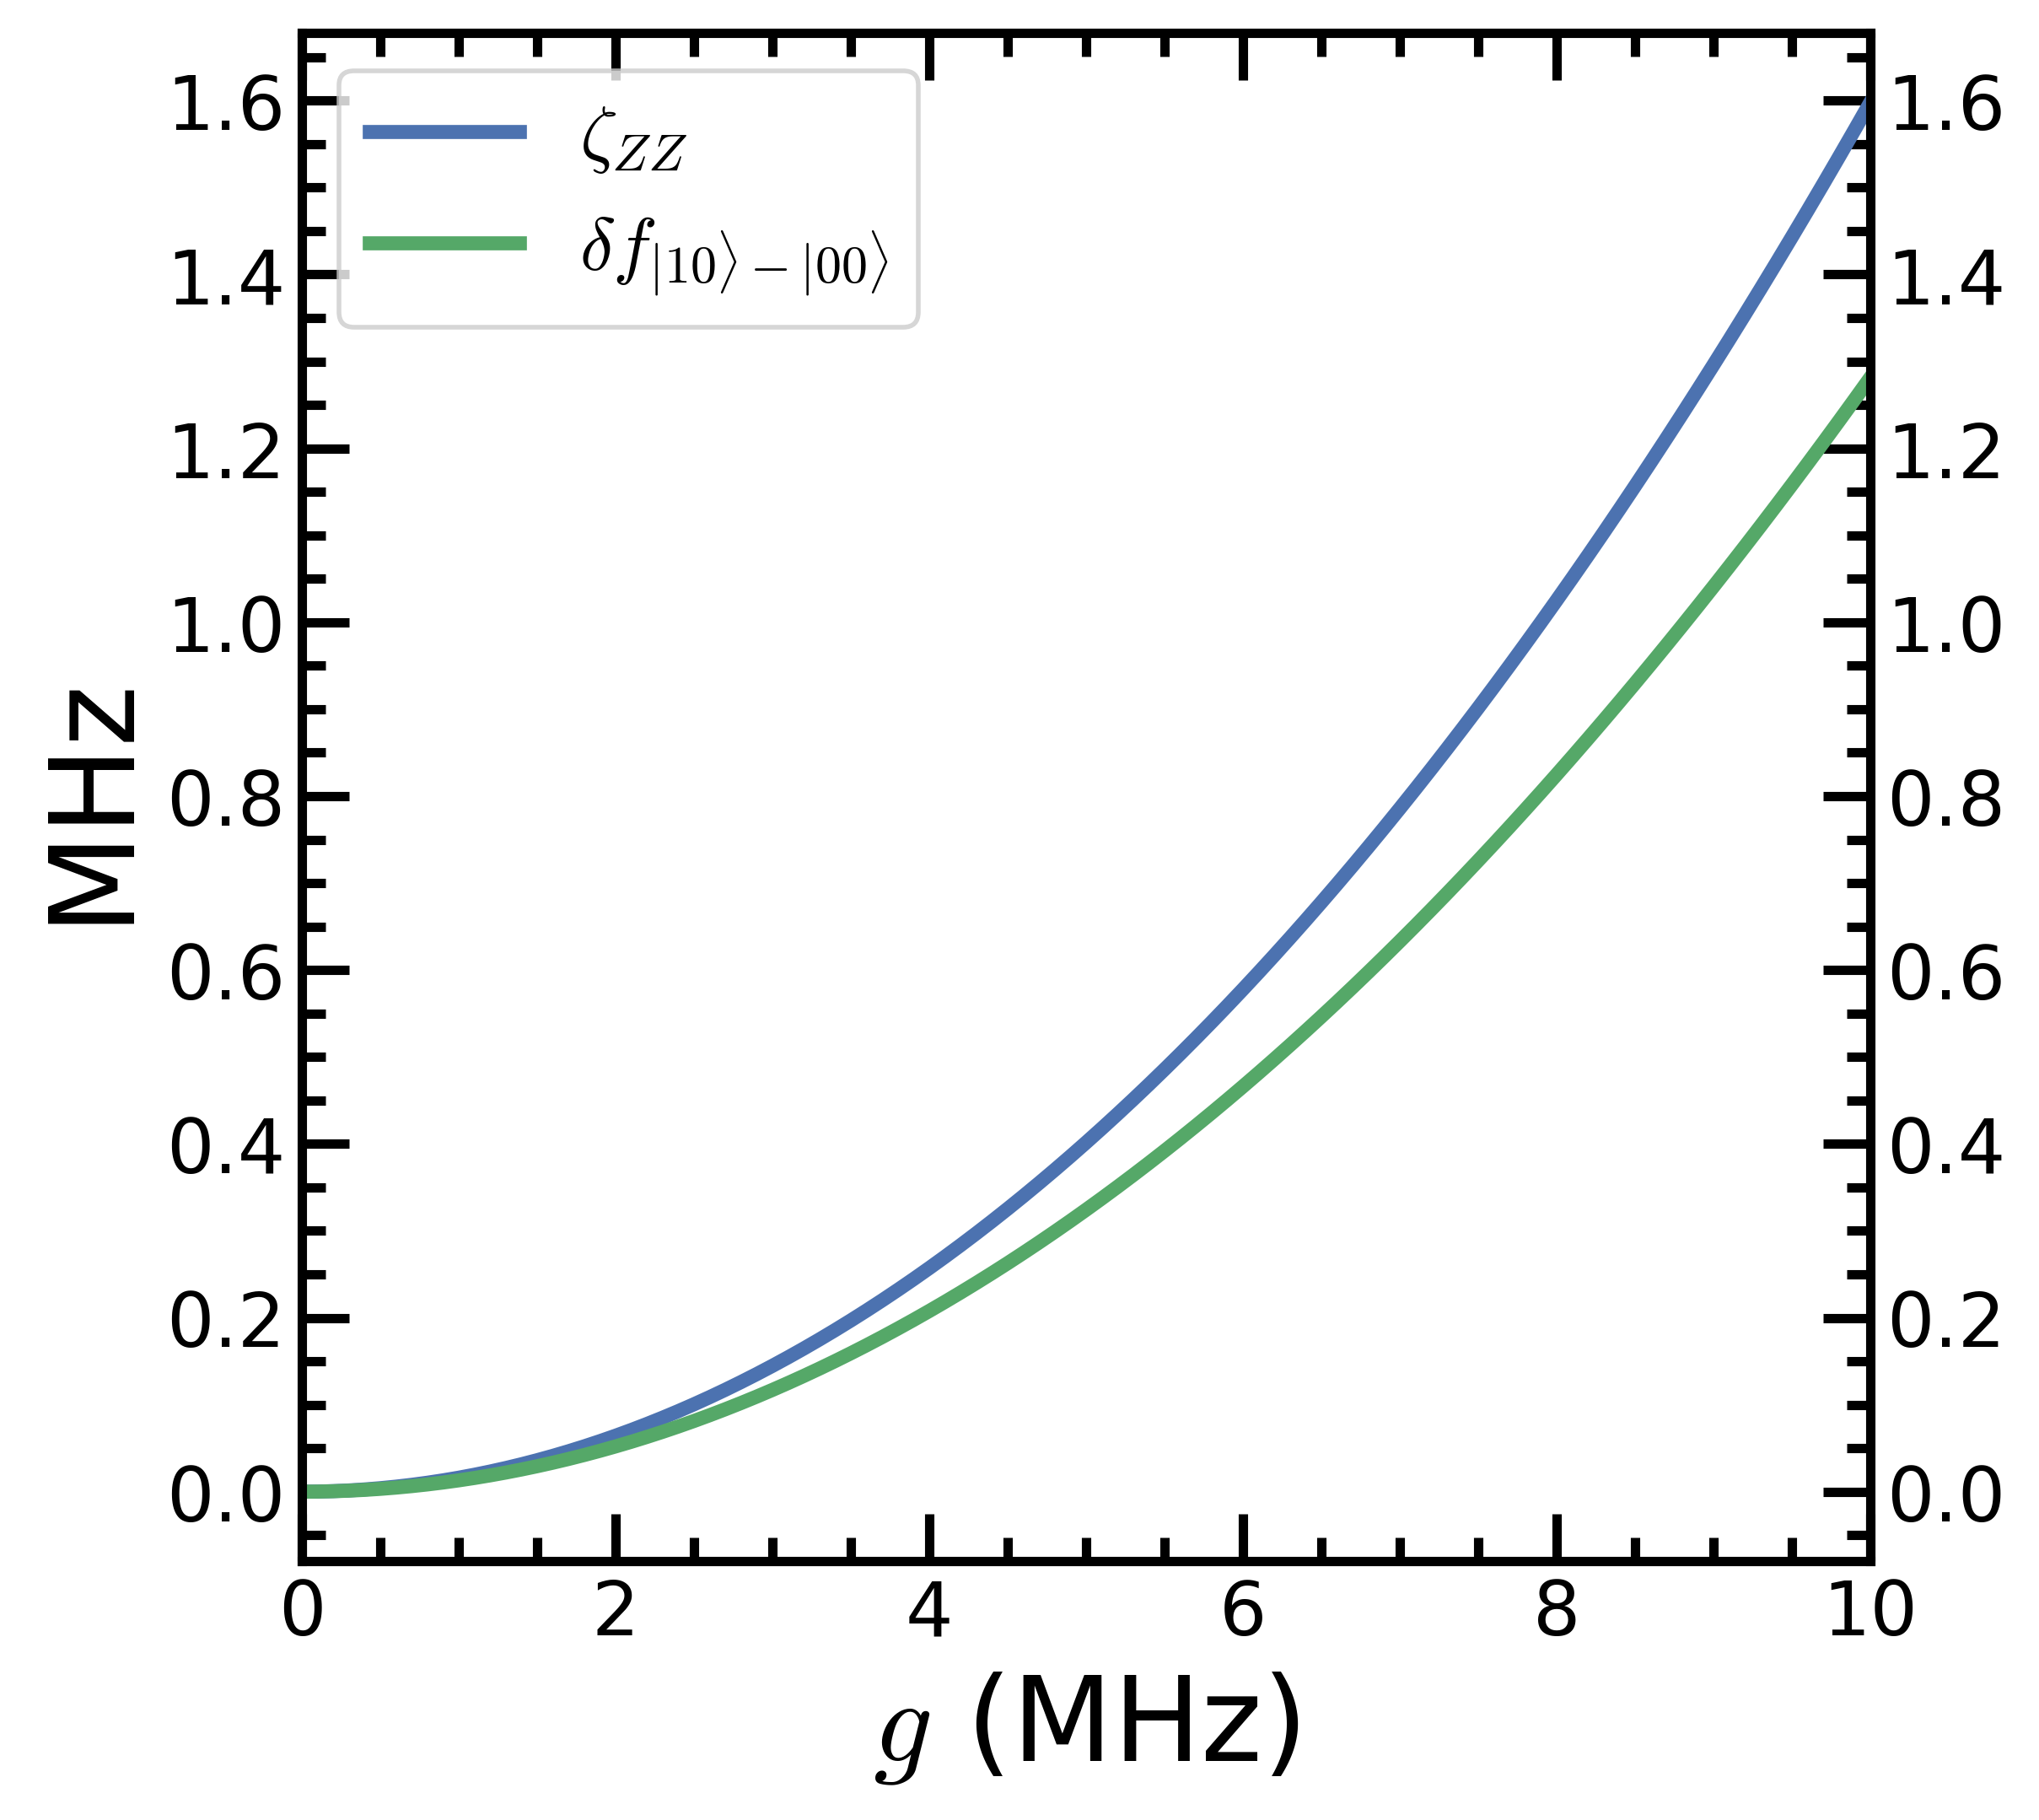

In [6]:
#Calculate ZZ rate:
plt.figure(figsize = [6,6])
zeta_ZZ = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift = energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :]
freq_shift = freq_shift - (energies_coupled_swE[system.level_label('10'), 0] - energies_coupled_swE[system.level_label('00'), 0])
plt.plot(E_int_array*1e3, abs(zeta_ZZ)*1e3, label = r'$\zeta_{ZZ}$')
plt.plot(E_int_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |00\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$g$ (MHz)')
plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])

# SQUID
## Parameters

In [7]:
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_squid as squid
import numpy as np
E_C = 0.2
E_Jsum = 22
d = 0.05
phi_ext = 0.0
nlev = 7
nlev_charge = 40
coupler = squid.Squid(E_C = E_C, E_Jsum = E_Jsum, d = d, phi_ext = phi_ext, nlev = nlev, nlev_charge = nlev_charge)

In [8]:
print(coupler.levels())

[-39.85538303 -31.67000664 -23.6966901  -15.94478668  -8.42516312
  -1.15065303   5.86327342]


In [9]:
print(coupler.n_ij(0,1))

(1.5992851171667595+0j)


In [10]:
phi_ext_array = np.linspace(0,1,101)*np.pi*2
energies = np.zeros((len(phi_ext_array), nlev))
for idx, phi_ext in enumerate (phi_ext_array):
    coupler = squid.Squid(E_C = E_C, E_Jsum = E_Jsum, d = d, phi_ext = phi_ext, nlev = nlev, nlev_charge = nlev_charge)
    energies[idx, :] = coupler.levels()

(0.0, 10.0)

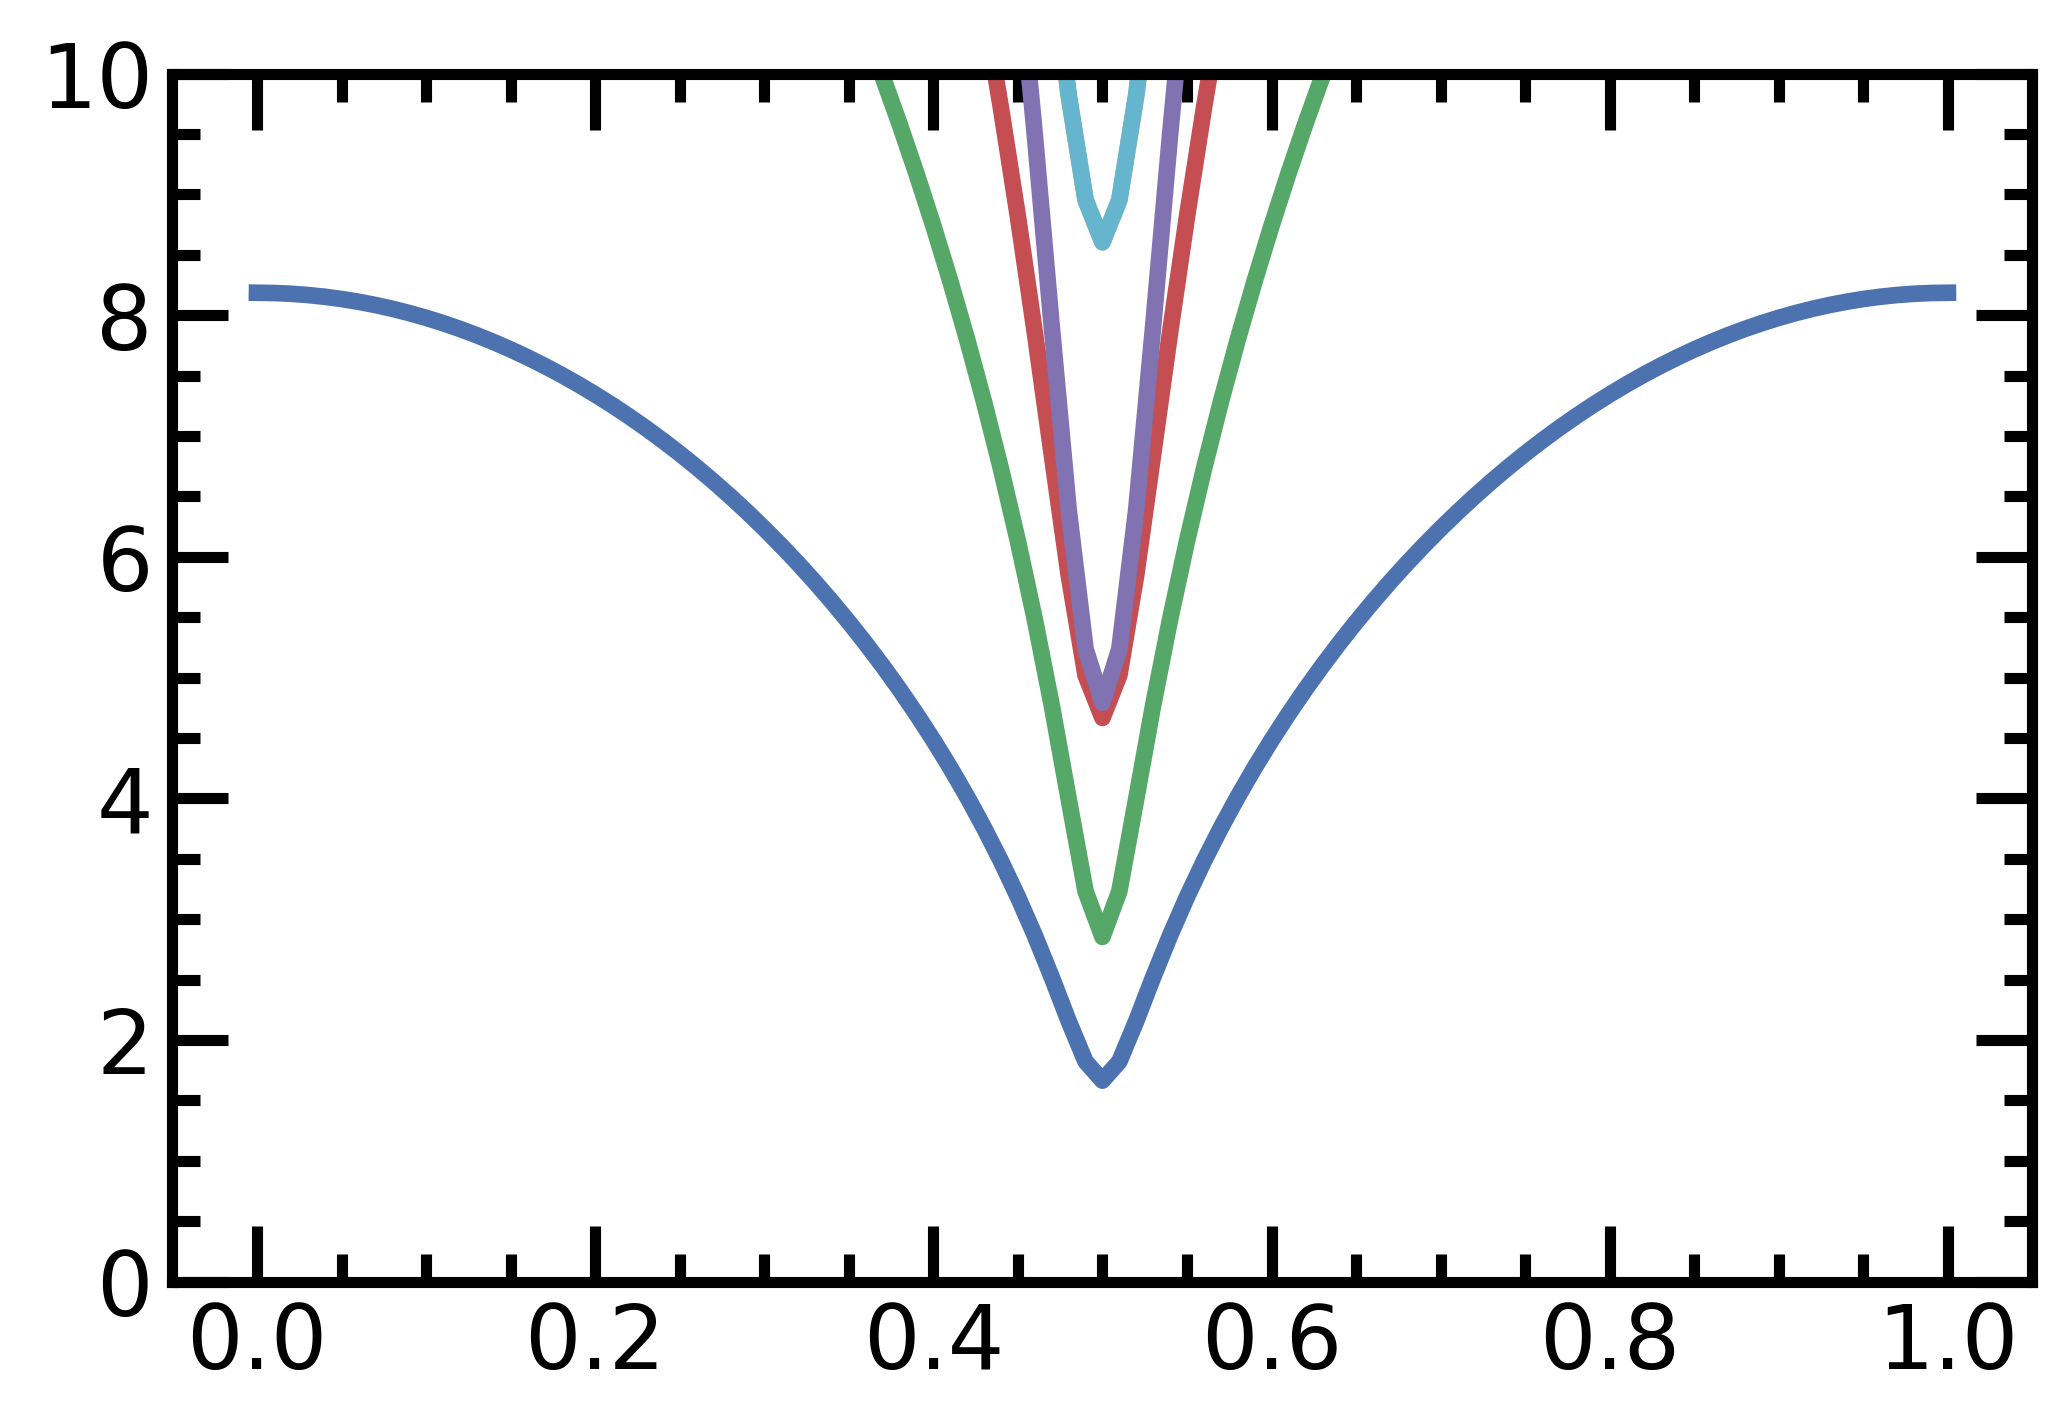

In [11]:
for idx in range (1, nlev):
    plt.plot(phi_ext_array/np.pi/2, energies[:,idx] - energies[:,0])
plt.ylim([0,10])